## Project Part 2 CPC251

#### Group Information

Group No: Derma2

- Member 1: Ang Chin Zhen (164820)
- Member 2: Axler Chin Shun Yuan (162331)
- Member 3: Chau Hong Feng (164823)
- Member 4: Marcus Tan Tung Chean (164952)

## Description

Our group selected the Dermatology.csv dataset (Derma2), which contains 33 features, with the task of predicting the diagnosis of erythemato-squamous diseases for each row. The objective of this project is to compare various machine learning models to determine which one most accurately classifies the rows into the correct erythemato-squamous diagnosis.

The two machine learning models chosen by our group are K-Nearest Neighbour and Neural Network.

### Import libraries

In [62]:
%config Completer.use_jedi = False 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import categorical_crossentropy
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.regularizers import l2

import keras.config

keras.config.disable_traceback_filtering()

### Load the dataset

In [2]:
# Set header = None because the dataset does not have a header
dataset = pd.read_csv("dermatology.csv", header = None)

# Define the column names
column_names = [
    'erythema', 'scaling', 'definite_borders', 'itching', 'koebner_phenomenon',
    'polygonal_papules', 'follicular_papules', 'oral_mucosal_involvement',
    'knee_and_elbow_involvement', 'scalp_involvement', 'family_history',
    'melanin_incontinence', 'eosinophils_infiltrate', 'PNL_infiltrate',
    'fibrosis_of_papillary_dermis', 'exocytosis', 'acanthosis', 'hyperkeratosis',
    'parakeratosis', 'clubbing_of_rete_ridges', 'elongation_of_rete_ridges',
    'thinning_of_suprapapillary_epidermis', 'spongiform_pustule', 'munro_microabcess',
    'focal_hypergranulosis', 'disappearance_of_granular_layer', 'vacuolisation_damage_of_basal_layer',
    'spongiosis', 'saw_tooth_appearance_of_retes', 'follicular_horn_plug', 'perifollicular_parakeratosis',
    'inflammatory_monoluclear_infiltrate', 'band_like_infiltrate', 'Age', 'Class'
 ]

# Assign the column names to the dataset
dataset.columns = column_names
dataset

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_granular_layer,vacuolisation_damage_of_basal_layer,spongiosis,saw_tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_infiltrate,band_like_infiltrate,Age,Class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25,4
362,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36,4
363,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,0,2,3,28,3
364,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,50,3


In [3]:
# Generate summary statistics for the dataset
dataset.describe()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,focal_hypergranulosis,disappearance_of_granular_layer,vacuolisation_damage_of_basal_layer,spongiosis,saw_tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_infiltrate,band_like_infiltrate,Class
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,...,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,2.068306,1.795082,1.549180,1.366120,0.633880,0.448087,0.166667,0.377049,0.614754,0.519126,...,0.393443,0.464481,0.456284,0.953552,0.453552,0.103825,0.114754,1.866120,0.554645,2.803279
std,0.664753,0.701527,0.907525,1.138299,0.908016,0.957327,0.570588,0.834147,0.982979,0.905639,...,0.849406,0.864899,0.954873,1.130172,0.954744,0.450433,0.488723,0.726108,1.105908,1.597803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,6.000000


In [4]:
# Before we proceed with split the dataset, we need to check for the distribution of the Age column
# Replace '?' with NaN because '?' is not a valid value
dataset = dataset.replace('?', np.nan)

# Convert the Age column to numeric type
dataset['Age'] = pd.to_numeric(dataset['Age'])

# Fill NaN values in the Age column with its 'mean' since the histogram is normally distributed
dataset['Age'] = dataset['Age'].fillna(dataset['Age'].mean())

# Check for null values to ensure that the dataset is clean
dataset.apply(lambda x: sum(x.isnull()), axis = 0)

erythema                                0
scaling                                 0
definite_borders                        0
itching                                 0
koebner_phenomenon                      0
polygonal_papules                       0
follicular_papules                      0
oral_mucosal_involvement                0
knee_and_elbow_involvement              0
scalp_involvement                       0
family_history                          0
melanin_incontinence                    0
eosinophils_infiltrate                  0
PNL_infiltrate                          0
fibrosis_of_papillary_dermis            0
exocytosis                              0
acanthosis                              0
hyperkeratosis                          0
parakeratosis                           0
clubbing_of_rete_ridges                 0
elongation_of_rete_ridges               0
thinning_of_suprapapillary_epidermis    0
spongiform_pustule                      0
munro_microabcess                 

### Split the dataset
Split the dataset into training, validation and test sets.
______________________________________________________________________________________
**Description:** In this step, datasets are split into 3 set which are training set, validation set and test set with each serve different purposes.

**Training Set:** The training set is used to train the machine learning model. It helps the model learn patterns and relationships within the data.</br>
**Validation Set:** The validation set is used for hyperparameter tuning and model selection. It allows you to assess how well the model generalizes to unseen data.</br>
**Test Set:** The test set provides an unbiased estimate of the model’s performance on completely new data. It helps evaluate the model’s ability to make accurate predictions.</br>

In [40]:
# First we allocate the X (features) and Y (target) variables
X = dataset[['erythema', 'scaling', 'definite_borders', 'itching', 'koebner_phenomenon',
    'polygonal_papules', 'follicular_papules', 'oral_mucosal_involvement',
    'knee_and_elbow_involvement', 'scalp_involvement', 'family_history',
    'melanin_incontinence', 'eosinophils_infiltrate', 'PNL_infiltrate',
    'fibrosis_of_papillary_dermis', 'exocytosis', 'acanthosis', 'hyperkeratosis',
    'parakeratosis', 'clubbing_of_rete_ridges', 'elongation_of_rete_ridges',
    'thinning_of_suprapapillary_epidermis', 'spongiform_pustule', 'munro_microabcess',
    'focal_hypergranulosis', 'disappearance_of_granular_layer', 'vacuolisation_damage_of_basal_layer',
    'spongiosis', 'saw_tooth_appearance_of_retes', 'follicular_horn_plug', 'perifollicular_parakeratosis',
    'inflammatory_monoluclear_infiltrate', 'band_like_infiltrate', 'Age']]

Y = dataset[['Class']]

In [41]:
# Split the dataset into training, validation and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, Y, test_size = 0.3, random_state = 10)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size = (2/3), random_state = 10)

In [42]:
# Check the shape of the datasets
print("Training set shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Validation set shape:", X_val.shape)
print("Validation labels shape:", y_val.shape)
print("Testing set shape:", X_test.shape)
print("Testing labels shape:", y_test.shape)

Training set shape: (256, 34)
Training labels shape: (256, 1)
Validation set shape: (36, 34)
Validation labels shape: (36, 1)
Testing set shape: (74, 34)
Testing labels shape: (74, 1)



### Data preprocessing
Perform data preprocessing such as normalization, standardization, label encoding etc.
______________________________________________________________________________________
**Description:** In this step, we performed normalization using the MinMaxScaler from sklearn.preprocessing. This scales and translates each feature individually such that it is in the given range on the training set, i.e., between zero and one.

In [44]:
# Normalize the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_val_scaled = pd.DataFrame(scaler.transform(X_val), columns=X_val.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [45]:
# Flatten to one-dimensional array
y_train = y_train.values.ravel()
y_val = y_val.values.ravel()
y_test = y_test.values.ravel()

**Description**: These lines convert the integer labels y_train and y_val into one-hot encoded format, then remove the first column from the one-hot encoded arrays. This preprocessing step, only useful for neural networks, ensures the labels are in the correct format by excluding the first class.

In [47]:
# Preprocessing to one hot encoding for Neural Network
y_train_one_hot = np.delete(to_categorical(y_train),0,1)
y_val_one_hot= np.delete(to_categorical(y_val),0,1)

### Feature Selection
Perform feature selection to select the relevant features.
______________________________________________________________________________________
In this step, it calculates and visualizes the correlations between each feature in the dataset (dataset) and a specified target variable ('Class'). The resulting horizontal bar plot provides a quick overview of which features are most positively correlated and negatively correlated with the target variable, helping to identify potentially important features for predicting the target variable's values.

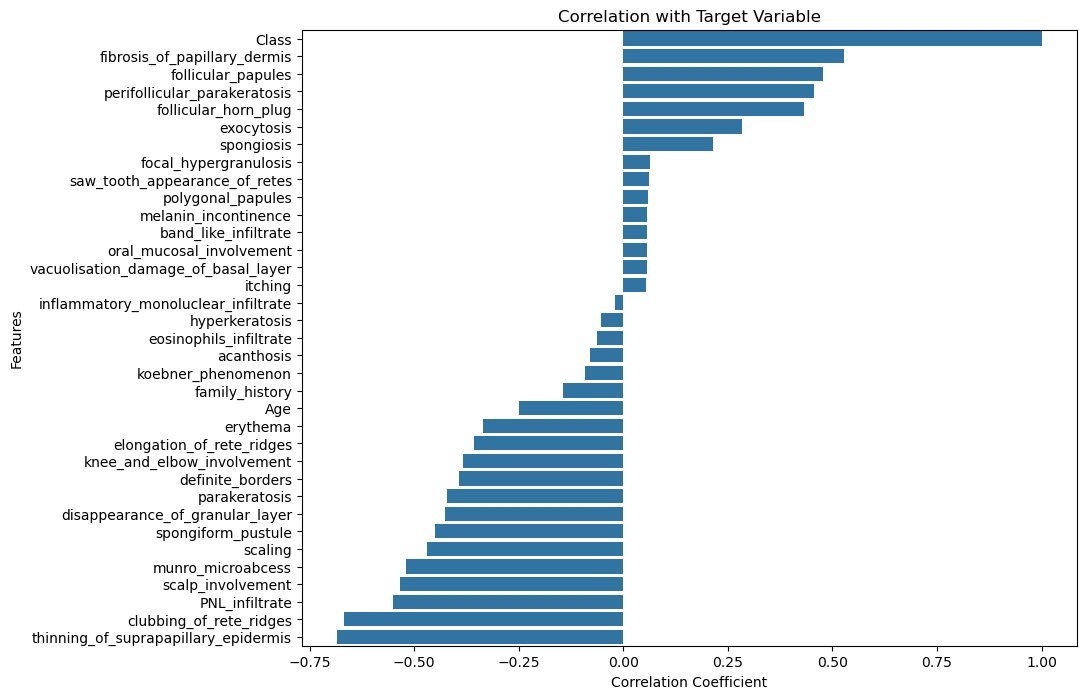

In [65]:
import seaborn as sns

# Calculate correlations
correlations = dataset.corrwith(dataset['Class'])

# Sort correlations
correlations_sorted = correlations.sort_values(ascending=False)

# Plot correlations
plt.figure(figsize=(10, 8))
sns.barplot(x=correlations_sorted.values, y=correlations_sorted.index, orient='h')
plt.title('Correlation with Target Variable')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()


**Description:** In this step, we are using **Univariate Selection** as a feature selection method. This method sorts features based on their mutual information scores. The top features with the highest mutual information are selected for further analysis or modeling. The steps below demonstrates how mutual information is used to sort the features based on its scores.

*Note:  We only perform feature selection for K-nearest neighbor (KNN) models, and not for neural networks. This is because neural networks can handle a larger number of features and learn relevant features during training, whereas KNN benefits from a reduced feature set for improved performance and efficiency.*

In [48]:
# Calculate mutual information between features and target
mi = mutual_info_classif(X_train, y_train)

# Create a Series with feature names
mi_series = pd.Series(mi, index=X.columns)

# Sort features by mutual information
sorted_mi = mi_series.sort_values(ascending=False)
top_n = min(15, len(sorted_mi))  # Adjust `top_n` to 15 or total number of features
selected_features = sorted_mi.index[:top_n].to_numpy()

print(selected_features)

['thinning_of_suprapapillary_epidermis' 'elongation_of_rete_ridges'
 'clubbing_of_rete_ridges' 'band_like_infiltrate' 'melanin_incontinence'
 'vacuolisation_damage_of_basal_layer' 'polygonal_papules'
 'oral_mucosal_involvement' 'saw_tooth_appearance_of_retes' 'exocytosis'
 'spongiosis' 'focal_hypergranulosis' 'knee_and_elbow_involvement'
 'fibrosis_of_papillary_dermis' 'koebner_phenomenon']


In [50]:
X_train_knn = X_train[selected_features]
X_val_knn = X_val[selected_features]
X_test_knn = X_test[selected_features]

### Data modeling
**K-Nearest Neighbors(KNN)** and **Neural Network** are used to train our model.
______________________________________________________________________________________
**Description:** These models learn from historical data and generalize patterns to make accurate predictions on new, unseen data. The goal is to find the best-performing model that balances accuracy, interpretability, and generalization.<br>

In this step, we will not perform hyperparameter tuning initially. Then, we will conduct hyperparameter tuning using grid search to identify the best model based on accuracy. We will also compare between the untuned model and a tuned model 


### Model 1: K-Nearest Neighbour

 In the initial step, we train the k-nearest neighbors (KNN) model with randomly initialized parameters.

In [52]:
# Initialize  KNN classifier 
knn = KNeighborsClassifier(n_neighbors=19)

# Train the model
knn.fit(X_train_knn, y_train)

# Predict using the trained model
y_pred_knn = knn.predict(X_val_knn)

In [53]:
# KNN evaluation
accuracy_knn = accuracy_score(y_val, y_pred_knn)
confusion_matrix_knn = confusion_matrix(y_val, y_pred_knn)

print("KNN Evaluation:")
print("=" * 32)
print(f"Accuracy: {accuracy_knn}","\n")
print(f"Confusion Matrix:\n {confusion_matrix_knn}""\n")
print('Precision, recall, F1-score:\n', classification_report(y_val, y_pred_knn))

KNN Evaluation:
Accuracy: 0.9444444444444444 

Confusion Matrix:
 [[13  0  0  0  0  0]
 [ 0  9  0  0  0  0]
 [ 0  0  4  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  1  0  0  4  0]
 [ 0  0  0  0  1  1]]

Precision, recall, F1-score:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       0.90      1.00      0.95         9
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         3
           5       0.80      0.80      0.80         5
           6       1.00      0.50      0.67         2

    accuracy                           0.94        36
   macro avg       0.95      0.88      0.90        36
weighted avg       0.95      0.94      0.94        36



In this step, we use GridSearchCV to find the optimal hyperparameters for the KNN model. 

We then compare its performance with the initial results obtained using randomly initialized parameters to prove the improvements.

In [54]:
# Define the parameter grid
param_grid_knn={
    "n_neighbors":range(1,30,2),
    "weights":["uniform", "distance"],
    "metric":["euclidean", "manhattan","minkowski"],
}

# Initialize GridSearchCV with 10-fold cross-validation
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=10, scoring='accuracy', n_jobs=-1)
    
# Fit the model to the training data
grid_search_knn.fit(X_train_knn,y_train)

# Get the best parameters
best_params = grid_search_knn.best_params_
print(f"Best parameters found: {best_params}")
print("Best Score: ", grid_search_knn.best_score_)

Best parameters found: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
Best Score:  0.9493846153846153


In [55]:
# Get best model
best_knn = grid_search_knn.best_estimator_

In [56]:
# Train the model with best parameter
best_knn.fit(X_train_knn, y_train)

In [57]:
# Predict using the trained model
y_pred_best_knn = best_knn.predict(X_val_knn)

# KNN evaluation
accuracy_knn = accuracy_score(y_val, y_pred_best_knn)
confusion_matrix_knn = confusion_matrix(y_val, y_pred_best_knn)

print("KNN Evaluation:")
print("=" * 32)
print(f"Accuracy: {accuracy_knn}","\n")
print(f"Confusion Matrix:\n {confusion_matrix_knn}""\n")
print('Precision, recall, F1-score:\n', classification_report(y_val, y_pred_best_knn))

KNN Evaluation:
Accuracy: 0.9722222222222222 

Confusion Matrix:
 [[13  0  0  0  0  0]
 [ 0  9  0  0  0  0]
 [ 0  0  4  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  0  0  0  5  0]
 [ 0  0  0  0  1  1]]

Precision, recall, F1-score:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         3
           5       0.83      1.00      0.91         5
           6       1.00      0.50      0.67         2

    accuracy                           0.97        36
   macro avg       0.97      0.92      0.93        36
weighted avg       0.98      0.97      0.97        36



Hence, it shows that by hypertuning the KNN model to optimal parameters which is the number of neighbours, weights and metrics, we are able to get a more accurate model by using the optimal parameters, where the result is retrieved from validation test dataset.

<br> Before Hyperparameter Tuning: **0.94444**
<br> After Hyperparameter Tuning: **0.97222**

### Model 2: Neural Network

A neural network is a computational model inspired by the brain's structure. It uses layers of interconnected neurons to process data. Through training, it adjusts these connections to learn patterns, making it effective for tasks like classification and regression in machine learning

This lines of code defines the function in creating a Neural network with the specified and required parameters. The initial best_units and best_learning_rate are random values for validation and will be soon replaced with best parameters after hyperparameter tuning

In [58]:
best_units = [64]
best_learning_rate = 0.001
def create_model(units=best_units, learning_rate=best_learning_rate):
    model = Sequential()
    model.add(Input(shape=(34,)))
    for unit in units:
        model.add(Dense(units=unit, activation='relu'))
    model.add(Dense(units=6, activation='softmax'))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss=categorical_crossentropy, metrics=['accuracy'])
    return model

We create a neural network before perform hyperparameter tuning to determine the effectiveness and accuracy of the model before and after the hyperparameter tuning. The random neural network has 3 layers, with the output being 6 units of neurons to indicate 6 different classes of outputs. We then compile the random model with adam optimizer, categorical crossentropy as the loss function, and accuracy as its metrics score. And finally we train the data with the training set.

In [66]:
random_NN = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(units = 32, activation = 'relu',kernel_regularizer=l2(0.01)),
    Dense(units = 32, activation = 'relu',kernel_regularizer=l2(0.01)),
    Dense(units = 6 , activation = 'softmax')
])
random_NN.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
random_NN.fit(X_train, y_train_one_hot,validation_data=(X_val,y_val_one_hot),batch_size= 32, epochs=10)

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.2830 - loss: 2.9233 - val_accuracy: 0.4444 - val_loss: 2.4234
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3078 - loss: 2.7255 - val_accuracy: 0.3611 - val_loss: 2.2095
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3024 - loss: 2.1568 - val_accuracy: 0.5278 - val_loss: 2.0085
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4973 - loss: 1.9821 - val_accuracy: 0.6389 - val_loss: 1.8071
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5114 - loss: 1.7507 - val_accuracy: 0.5000 - val_loss: 1.7033
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5124 - loss: 1.6296 - val_accuracy: 0.5833 - val_loss: 1.6140
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6160 - loss: 1.5146 - val_accuracy: 0.6389 - val_loss: 1.5283
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6491 - loss: 1.4695 - val_accuracy: 0.7778 - val_loss: 1.4595

In [67]:
y_pred_random = random_NN.predict(X_val)
y_pred_random = 1 + np.argmax(y_pred_random, axis=1)

print('Validation set: \n')
print('Accuracy:',accuracy_score(y_val, y_pred_random), '\n')
print('Confusion matrix:\n',confusion_matrix(y_val, y_pred_random), '\n')
print('Precision, recall, F1-score:\n',classification_report(y_val, y_pred_random))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Validation set: 

Accuracy: 0.7777777777777778 

Confusion matrix:
 [[13  0  0  0  0  0]
 [ 1  8  0  0  0  0]
 [ 0  0  4  0  0  0]
 [ 1  1  0  1  0  0]
 [ 2  1  0  0  2  0]
 [ 1  0  0  1  0  0]] 

Precision, recall, F1-score:
               precision    recall  f1-score   support

           1       0.72      1.00      0.84        13
           2       0.80      0.89      0.84         9
           3       1.00      1.00      1.00         4
           4       0.50      0.33      0.40         3
           5       1.00      0.40      0.57         5
           6       0.00      0.00      0.00         2

    accuracy                           0.78        36
   macro avg       0.67      0.60      0.61        36
weighted avg       0.75      0.78      0.74        36



D:\Users\Chin Zhen Ang\Documents\anaconda\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Users\Chin Zhen Ang\Documents\anaconda\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Users\Chin Zhen Ang\Documents\anaconda\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

Next step is to create a parameter grid to find the optimal parameters to create the best neural network models, to ensure higher accuracy.

In [68]:
param_grid = {
    'model__units': [[64], [128], [64, 32]],
    'model__learning_rate': [0.001, 0.01, 0.05],
    'batch_size': [32, 64, 128],
    'epochs': [10,20,30]
}

# Perform the grid search
gs = GridSearchCV(model, param_grid, refit=False, cv=2, scoring='accuracy')

gs.fit(X_train, y_train_one_hot)
print("Best accuracy score :", gs.best_score_)
print("Best Parameters:", gs.best_params_)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1521 - loss: 5.5130
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0896 - loss: 4.1682 
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0615 - loss: 2.7602 
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1771 - loss: 1.9758 
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3969 - loss: 1.3444 
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3833 - loss: 1.3752 
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4948 - loss: 1.2415 
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5250 - loss: 1.1324 
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8010 - loss: 0.8779 
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7552 - loss: 0.8448 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  
Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2073 - loss: 8.0197
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step -

Now that we obtained the best parameters for the neural network with an accuracy of 0.96875, we fit the following into a new and better neural_network with the following parameters:
<br>    Batch_size : 32
<br>    epochs : 20
<br>    learning_rate = 0.05
<br>    model units = [128]

In [69]:
best_NN = create_model()

best_units = gs.best_params_['model__units']
best_learning_rate = gs.best_params_['model__learning_rate']
best_batch_size = gs.best_params_['batch_size']
best_epochs = gs.best_params_['epochs']

best_NN.fit(X_train, y_train_one_hot, 
               batch_size=best_batch_size, 
               epochs=best_epochs, 
               verbose=1, 
               validation_data=(X_val,y_val_one_hot ))  

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - accuracy: 0.1832 - loss: 9.8967 - val_accuracy: 0.3333 - val_loss: 3.9721
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3763 - loss: 6.2299 - val_accuracy: 0.3889 - val_loss: 2.8209
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3242 - loss: 4.5191 - val_accuracy: 0.4722 - val_loss: 2.2120
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4876 - loss: 3.2431 - val_accuracy: 0.6111 - val_loss: 1.6293
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5507 - loss: 2.2614 - val_accuracy: 0.5556 - val_loss: 1.1826
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5639 - loss: 1.3394 - val_accuracy: 0.6389 - val_loss: 1.0550
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6493 - loss: 1.0125 - val_accuracy: 0.4722 - val_loss: 1.1989
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6252 - loss: 0.9511 - val_accuracy: 0.5833 - val_loss: 1.0929


In [81]:
y_pred_val = best_NN.predict(X_val)
y_pred_val = 1 + np.argmax(y_pred_val, axis=1)

print('Validation set: \n')
print('Accuracy:', accuracy_score(y_val, y_pred_val))
print('confusion_matrix:\n',confusion_matrix(y_val, y_pred_val))
print('Precision, recall, F1-score:\n',classification_report(y_val, y_pred_val))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Validation set: 

Accuracy: 0.9722222222222222
confusion_matrix:
 [[13  0  0  0  0  0]
 [ 0  9  0  0  0  0]
 [ 0  0  4  0  0  0]
 [ 0  1  0  2  0  0]
 [ 0  0  0  0  5  0]
 [ 0  0  0  0  0  2]]
Precision, recall, F1-score:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       0.90      1.00      0.95         9
           3       1.00      1.00      1.00         4
           4       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         2

    accuracy                           0.97        36
   macro avg       0.98      0.94      0.96        36
weighted avg       0.98      0.97      0.97        36



By comparing the accuracy tested on the validation set, we can conclude that after hyperparameter tuning, the new neural network model performs better with a higher accuracy score.
<br> accuracy before hyperparameter tuning: **0.777778**
<br> accuracy after hyperparameter tuning: **0.972222**

### Evaluate the models
Perform a comparison between K-Nearest Neighbour and Neural Network. <br>
______________________________________________________________________________________
**Description:** We evaluated the model using accuracy, precision, recall, F1 score, confusion matrix, and classification report for both models.

### Model 1: K-Nearest Neighbour

In [71]:
y_predict_knn = best_knn.predict(X_test_knn)

In [72]:
print("KNN Evaluation Results")
print("=" * 32)
knn_accuracy = accuracy_score(y_test, y_predict_knn)
knn_precision = precision_score(y_test, y_predict_knn, average='weighted')
knn_recall = recall_score(y_test, y_predict_knn, average='weighted')
knn_f1 = f1_score(y_test, y_predict_knn, average='weighted')

print("Accuracy: ", round(knn_accuracy, 6))
print("Precision: ", round(knn_precision, 6))
print("Recall: ", round(knn_recall, 6))
print("F1 Score: ", round(knn_f1, 6))

# Confusion matrix
knn_cfMatrix = confusion_matrix(y_test, y_predict_knn)
print("\nConfusion matrix: ")
print(knn_cfMatrix)

# Classification report
print("\nClassification Report: ")
print(classification_report(y_test, y_predict_knn))

KNN Evaluation Results
Accuracy:  0.959459
Precision:  0.959459
Recall:  0.959459
F1 Score:  0.959459

Confusion matrix: 
[[25  0  0  0  0  0]
 [ 0  7  0  0  0  1]
 [ 0  0 15  0  0  0]
 [ 0  1  0  7  0  0]
 [ 0  0  0  0 13  0]
 [ 0  0  0  1  0  4]]

Classification Report: 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        25
           2       0.88      0.88      0.88         8
           3       1.00      1.00      1.00        15
           4       0.88      0.88      0.88         8
           5       1.00      1.00      1.00        13
           6       0.80      0.80      0.80         5

    accuracy                           0.96        74
   macro avg       0.92      0.92      0.92        74
weighted avg       0.96      0.96      0.96        74



### Model 2: Neural Network

In [73]:
y_pred_NN = best_NN.predict(X_test)
y_pred_NN = 1 + np.argmax(y_pred_NN, axis=1)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [77]:
print("Neural Network Evaluation Results")
print("=" * 32)
NN_accuracy = accuracy_score(y_test, y_pred_NN)
NN_precision = precision_score(y_test, y_pred_NN, average='weighted')
NN_recall = recall_score(y_test, y_pred_NN, average='weighted')
NN_f1 = f1_score(y_test, y_pred_NN, average='weighted')

print("Accuracy: ", round(NN_accuracy, 6))
print("Precision: ", round(NN_precision, 6))
print("Recall: ", round(NN_recall, 6))
print("F1 Score: ", round(NN_f1, 6))

# Confusion matrix
NN_cfMatrix = confusion_matrix(y_test, y_pred_NN)
print("\nConfusion matrix: ")
print(NN_cfMatrix)

# Classification report
print("\nClassification Report: ")
print(classification_report(y_test, y_pred_NN))

Neural Network Evaluation Results
Accuracy:  0.959459
Precision:  0.960532
Recall:  0.959459
F1 Score:  0.9593

Confusion matrix: 
[[25  0  0  0  0  0]
 [ 0  7  0  1  0  0]
 [ 0  0 15  0  0  0]
 [ 0  2  0  6  0  0]
 [ 0  0  0  0 13  0]
 [ 0  0  0  0  0  5]]

Classification Report: 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        25
           2       0.78      0.88      0.82         8
           3       1.00      1.00      1.00        15
           4       0.86      0.75      0.80         8
           5       1.00      1.00      1.00        13
           6       1.00      1.00      1.00         5

    accuracy                           0.96        74
   macro avg       0.94      0.94      0.94        74
weighted avg       0.96      0.96      0.96        74



We also make a comparison for both model's confusion matrix by plotting a heatmap using seaborn library. This method can visualize which classes both models do better at and easier to make comparisons.

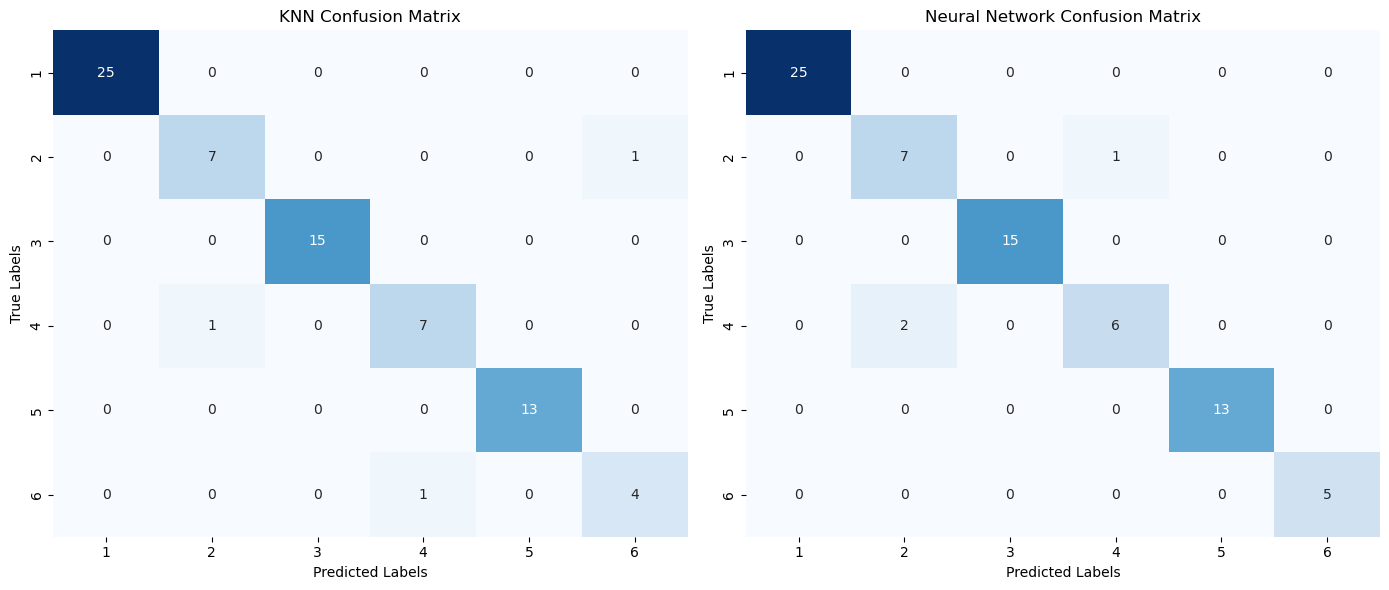

In [80]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.heatmap(knn_cfMatrix, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=['1', '2', '3', '4', '5', '6'], 
            yticklabels=['1', '2', '3', '4', '5', '6'])  
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.subplot(1, 2, 2)
sns.heatmap(NN_cfMatrix, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=['1', '2', '3', '4', '5', '6'],  
            yticklabels=['1', '2', '3', '4', '5', '6'])  
plt.title('Neural Network Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.tight_layout()
plt.show()

### Comparison and Discussion
**K-Nearest Neighbors(KNN)** and **Neural Network** are used to train our model.
______________________________________________________________________________________

**K-Nearest Neighbors (KNN)**
Accuracy:  0.959459
Precision:  0.960532
Recall:  0.959459
F1 Score:  0.9593

**Neural Network**
Accuracy:  0.959459
Precision:  0.960532
Recall:  0.959459
F1 Score:  0.9593

<br>**Accuracy:**
Accuracy is the proportion of correctly classified instances (both true positives and true negatives) out of the total number of instances.
Interpretation: Both models scores an accuracy of **0.959459** means that the model correctly predicts **95.9459%** of the cases in the dataset.

<br>**Precision:**
Precision is the ratio of correctly predicted positive observations (true positives) to the total predicted positive observations.
Interpretation: Both models scores a precision of **0.960532** indicates that when the model predicts a positive class, it is correct **96.0532%** of the time.

<br>**Recall:**
Recall is the ratio of correctly predicted positive observations (true positives) to all observations in the actual class.
Interpretation:Both models scores the recall of **0.959459** means that the model identifies **95.9459%** of all positive instances correctly.

<br>**F1 scores:**
F1 score is the harmonic mean of precision and recall. It provides a single metric that balances both precision and recall.
Interpretation: Both models scores the F1 score of **0.9593** indicates the harmonic mean of precision and recall is **95.93%**.

______________________________________________________________________________________

Both models seems to have identical and reletively good performance, therefore both of the models can be chosen and should be chosen based on the required situation. By looking at the heatmap generated with the seaborn, we can analyze each of the class individually and compare between both models to decide which model can predict more correctly and accurately.
       Class code:   Class:                  
       1             psoriasis			    
       2             seboreic dermatitis             
       3             lichen planus                   
       4             pityriasis rosea                
       5             cronic dermatitis                  
       6             pityriasis rubra pilaris    

<br>**Class 1:**
Both models are able to predict all the classes that is supposed to be class 1, which the accuracy scores for both models in predicting class 1 is **100.00%**

<br>**Class 2:**
In K-nearest neighbour models, it predicts 7 out of the 8 values that is supposed to be class of 2 correctly, whereby one of them predicted wrongly as class 6. 
In Neural network model, it predicts 7 out of the 8 values that is supposed to be class of 2 correctly, whereby one of them predicted wrongly and labeled as class 4.
And therefore, the accuracy scores for predicting class 2 in both models are **87.5%**

<br>**Class 3:**
Both models are able to predict all the classes that is supposed to be class 3, which the accuracy scores for both models in predicting class 3 is **100.00%**

<br>**Class 4:**
In K-nearest neighbour models, it predicts 7 out of the 8 values that is supposed to be class of 4 correctly, whereby one of them predicted wrongly as class 2. 
In Neural network model, it predicts 6 out of the 8 values that is supposed to be class of 2 correctly, whereby one of them predicted wrongly and labeled as class 2.
And therefore, the accuracy scores for predicting class 4 in K-nearest neighbour is **87.5%**, and accuracy scores for predicting class 4 in Neural Network is **75%**.

<br>**Class 5:**
Both models are able to predict all the classes that is supposed to be class 5, which the accuracy scores for both models in predicting class 5 is **100.00%

<br>**Class 6:**
In K-nearest neighbour models, it predicts 4 out of the 5 values that is supposed to be class of 6 correctly, whereby one of them predicted wrongly as class 4. 
In Neural network model, it is able to predict all the classes that is supposed to be class 5
And therefore, the accuracy scores for predicting class 6 in K-nearest neighbour is **80.0%**, and accuracy scores for predicting class 6 is in Neural Network is **100%**.

### Choice of model
There are also other factors that can be chosen to use as the prediction model.
<br> **Computational Efficiency:**
KNN can be computationally expensive for large datasets as it requires storing the entire training dataset and performing distance calculations at prediction time. Neural Networks, after training, typically have faster prediction times but require significant computational resources for training.

<br> **Ease of understanding:** 
Model Interpretability: KNN is often more interpretable as it simply classifies based on the majority class of the nearest neighbors. Neural Networks are harder to interpret especially for people in the field of medical have abit of trouble in determining the working of the model.

<br> **Scalability:**
Neural Networks can scale better with larger datasets and complex patterns, whereas KNN might struggle as the dataset grows.

### Conclusion
    
In conclusion, while both models demonstrate high overall accuracy, their strengths lie in different areas: both models excels in determine the disease between psoriasis, lichen planus and cronic dermatitis. While KNN perform better when classifying pityriasis rosea disease, Neural Network classifies more accurately when it comes to predicting pityriasis rubra pilaris disease. Choosing between these models would depend on the specific requirements of the application.